In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
pd.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv("Building_Energy_Benchmarking_Data__2015-Present.csv")
df.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFABuildings,PropertyGFAParking,SelfReportGFATotal,SelfReportGFABuildings,SelfReportParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),EPAPropertyType,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Demolished
0,1,2023,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.61220,-122.33799,DOWNTOWN,7,1927,12.0,1.0,88434,88434,0,88434,88434,0,61.0,89.400002,90.099998,7970388.0,7905224.0,168.100006,170.199997,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,1047120.0,2797857.0,15998.0,Compliant,No Issue,3572773.0,1599760.0,332.1,3.76,False
1,2,2023,PARAMOUNT HOTEL,NonResidential,659000220,724 PINE ST,SEATTLE,WA,98101,47.61307,-122.33361,DOWNTOWN,7,1996,11.0,1.0,103566,88502,15064,103566,88502,15064,84.0,74.000000,73.900002,6539607.0,6545706.0,130.699997,130.600006,Hotel,Hotel,88502.0,Parking,15064.0,NaN,NaN,786237.0,NaN,38570.0,Compliant,No Issue,2682640.0,3856970.0,220.0,2.49,False
2,3,2023,WESTIN HOTEL (Parent Building),NonResidential,659000475,1900 5TH AVE,SEATTLE,WA,98101,47.61367,-122.33822,DOWNTOWN,7,1969,41.0,3.0,956110,759392,196718,947059,827566,119493,75.0,77.599998,77.699997,64340116.0,64252124.0,165.500000,165.699997,Hotel,Hotel,827566.0,Parking,117783.0,Swimming Pool,0.0,11121130.0,20494222.0,59006.0,Compliant,No Issue,37945296.0,5900600.0,2192.8,2.89,False
3,5,2023,HOTEL MAX,NonResidential,659000640,620 STEWART ST,SEATTLE,WA,98101,47.61412,-122.33664,DOWNTOWN,7,1926,10.0,1.0,61320,61320,0,61320,61320,0,55.0,81.000000,82.099998,5033692.0,4966592.0,162.199997,165.300003,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,780180.0,1248616.0,11231.0,Compliant,No Issue,2661973.0,1123100.0,176.1,2.87,False
4,8,2023,WARWICK SEATTLE HOTEL,NonResidential,659000970,401 LENORA ST,SEATTLE,WA,98121,47.61375,-122.34047,DOWNTOWN,7,1980,18.0,1.0,175580,113580,62000,203942,123445,80497,83.0,104.000000,104.300003,12875073.0,12838968.0,176.399994,177.300003,Hotel,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,1401668.0,NaN,80926.0,Compliant,No Issue,4782491.0,8092580.0,456.6,4.02,False


<Axes: >

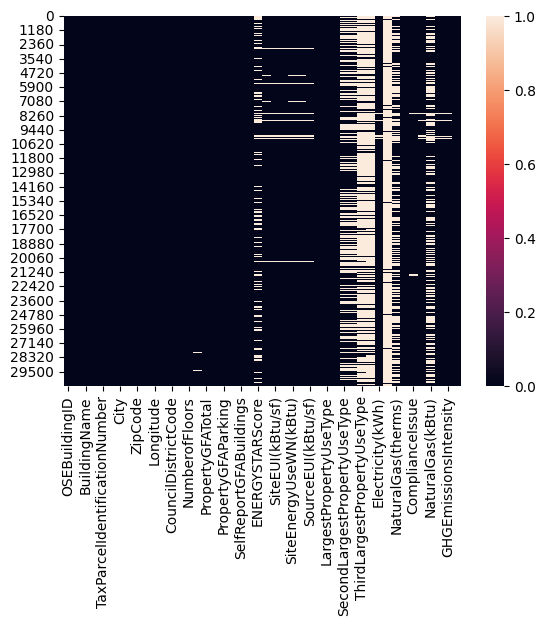

In [3]:
df.columns
df.shape
df.describe()
sns.heatmap(df.isnull())

In [4]:
df.head(1)

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFABuildings,PropertyGFAParking,SelfReportGFATotal,SelfReportGFABuildings,SelfReportParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),EPAPropertyType,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Demolished
0,1,2023,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,-122.33799,DOWNTOWN,7,1927,12.0,1.0,88434,88434,0,88434,88434,0,61.0,89.400002,90.099998,7970388.0,7905224.0,168.100006,170.199997,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,1047120.0,2797857.0,15998.0,Compliant,No Issue,3572773.0,1599760.0,332.1,3.76,False


In [5]:
df.rename(columns={
    'ENERGYSTARScore': 'energy_star_score',
    'SiteEUIWN(kBtu/sf)': 'energy_use_per_area_weather_adj',
    'SiteEUI(kBtu/sf)': 'energy_use_per_area',
    'SiteEnergyUse(kBtu)': 'total_energy_use',
    'SiteEnergyUseWN(kBtu)': 'total_energy_use_weather_adj',
    'SourceEUIWN(kBtu/sf)': 'source_energy_per_area_weather_adj',
    'SourceEUI(kBtu/sf)': 'source_energy_per_area',
    'EPAPropertyType': 'property_type',
    'LargestPropertyUseType': 'main_use_of_property',
    'LargestPropertyUseTypeGFA': 'main_use_area',
    'SecondLargestPropertyUseType': 'second_use_of_property',
    'SecondLargestPropertyUseTypeGFA': 'second_use_area',
    'ThirdLargestPropertyUseType': 'third_use_of_property',
    'ThirdLargestPropertyUseTypeGFA': 'third_use_area',
    'Electricity(kWh)': 'electricity_used_kwh',
    'SteamUse(kBtu)': 'steam_used',
    'NaturalGas(therms)': 'gas_used_therms',
    'ComplianceStatus': 'compliance_status',
    'ComplianceIssue': 'compliance_issue',
    'Electricity(kBtu)': 'electricity_used',
    'NaturalGas(kBtu)': 'gas_used',
    'TotalGHGEmissions': 'total_emissions',
    'GHGEmissionsIntensity': 'emissions_per_area',
    'Demolished': 'was_demolished'
}, inplace=True)


In [6]:
df.drop(["OSEBuildingID","TaxParcelIdentificationNumber"],axis=1,inplace=True)

In [7]:
df.head(3)
df["DataYear"]=pd.to_datetime(df["DataYear"])


In [8]:
df.isnull().sum() / len(df) * 100

DataYear                               0.000000
BuildingName                           0.000000
BuildingType                           0.000000
Address                                0.000000
City                                   0.000000
State                                  0.000000
ZipCode                                0.000000
Latitude                               0.000000
Longitude                              0.000000
Neighborhood                           0.000000
CouncilDistrictCode                    0.000000
YearBuilt                              0.000000
NumberofFloors                         0.270738
NumberofBuildings                      0.958998
PropertyGFATotal                       0.000000
PropertyGFABuildings                   0.000000
PropertyGFAParking                     0.000000
SelfReportGFATotal                     0.000000
SelfReportGFABuildings                 0.000000
SelfReportParking                      0.000000
energy_star_score                     25

In [9]:
df.drop(["second_use_of_property","second_use_area","third_use_of_property","third_use_area","steam_used","gas_used_therms","gas_used"],axis=1,inplace=True)
df = df.fillna(df.mean(numeric_only=True))

In [10]:
df["Month"] = df["DataYear"].dt.month
df["Year"] = df["DataYear"].dt.year
df.drop("DataYear",axis=1,inplace=True)


In [11]:
numerical_col=df.select_dtypes(include=["number"]).columns.tolist()
catagorical_col=df.select_dtypes("object").columns.tolist()

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
imputer.fit(df[numerical_col])
df[numerical_col]=imputer.transform(df[numerical_col])
df.head(1)
df.isnull().sum() / len(df) * 100
df.head(1)

,BuildingName,BuildingType,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFABuildings,PropertyGFAParking,SelfReportGFATotal,SelfReportGFABuildings,SelfReportParking,energy_star_score,energy_use_per_area_weather_adj,energy_use_per_area,total_energy_use,total_energy_use_weather_adj,source_energy_per_area_weather_adj,source_energy_per_area,property_type,main_use_of_property,main_use_area,electricity_used_kwh,compliance_status,compliance_issue,electricity_used,total_emissions,emissions_per_area,was_demolished,Month,Year
0,MAYFLOWER PARK HOTEL,NonResidential,405 OLIVE WAY,SEATTLE,WA,98101.0,47.6122,-122.33799,DOWNTOWN,7.0,1927.0,12.0,1.0,88434.0,88434.0,0.0,88434.0,88434.0,0.0,61.0,89.400002,90.099998,7970388.0,7905224.0,168.100006,170.199997,Hotel,Hotel,88434.0,1047120.0,Compliant,No Issue,3572773.0,332.1,3.76,False,1.0,1970.0


<Axes: >

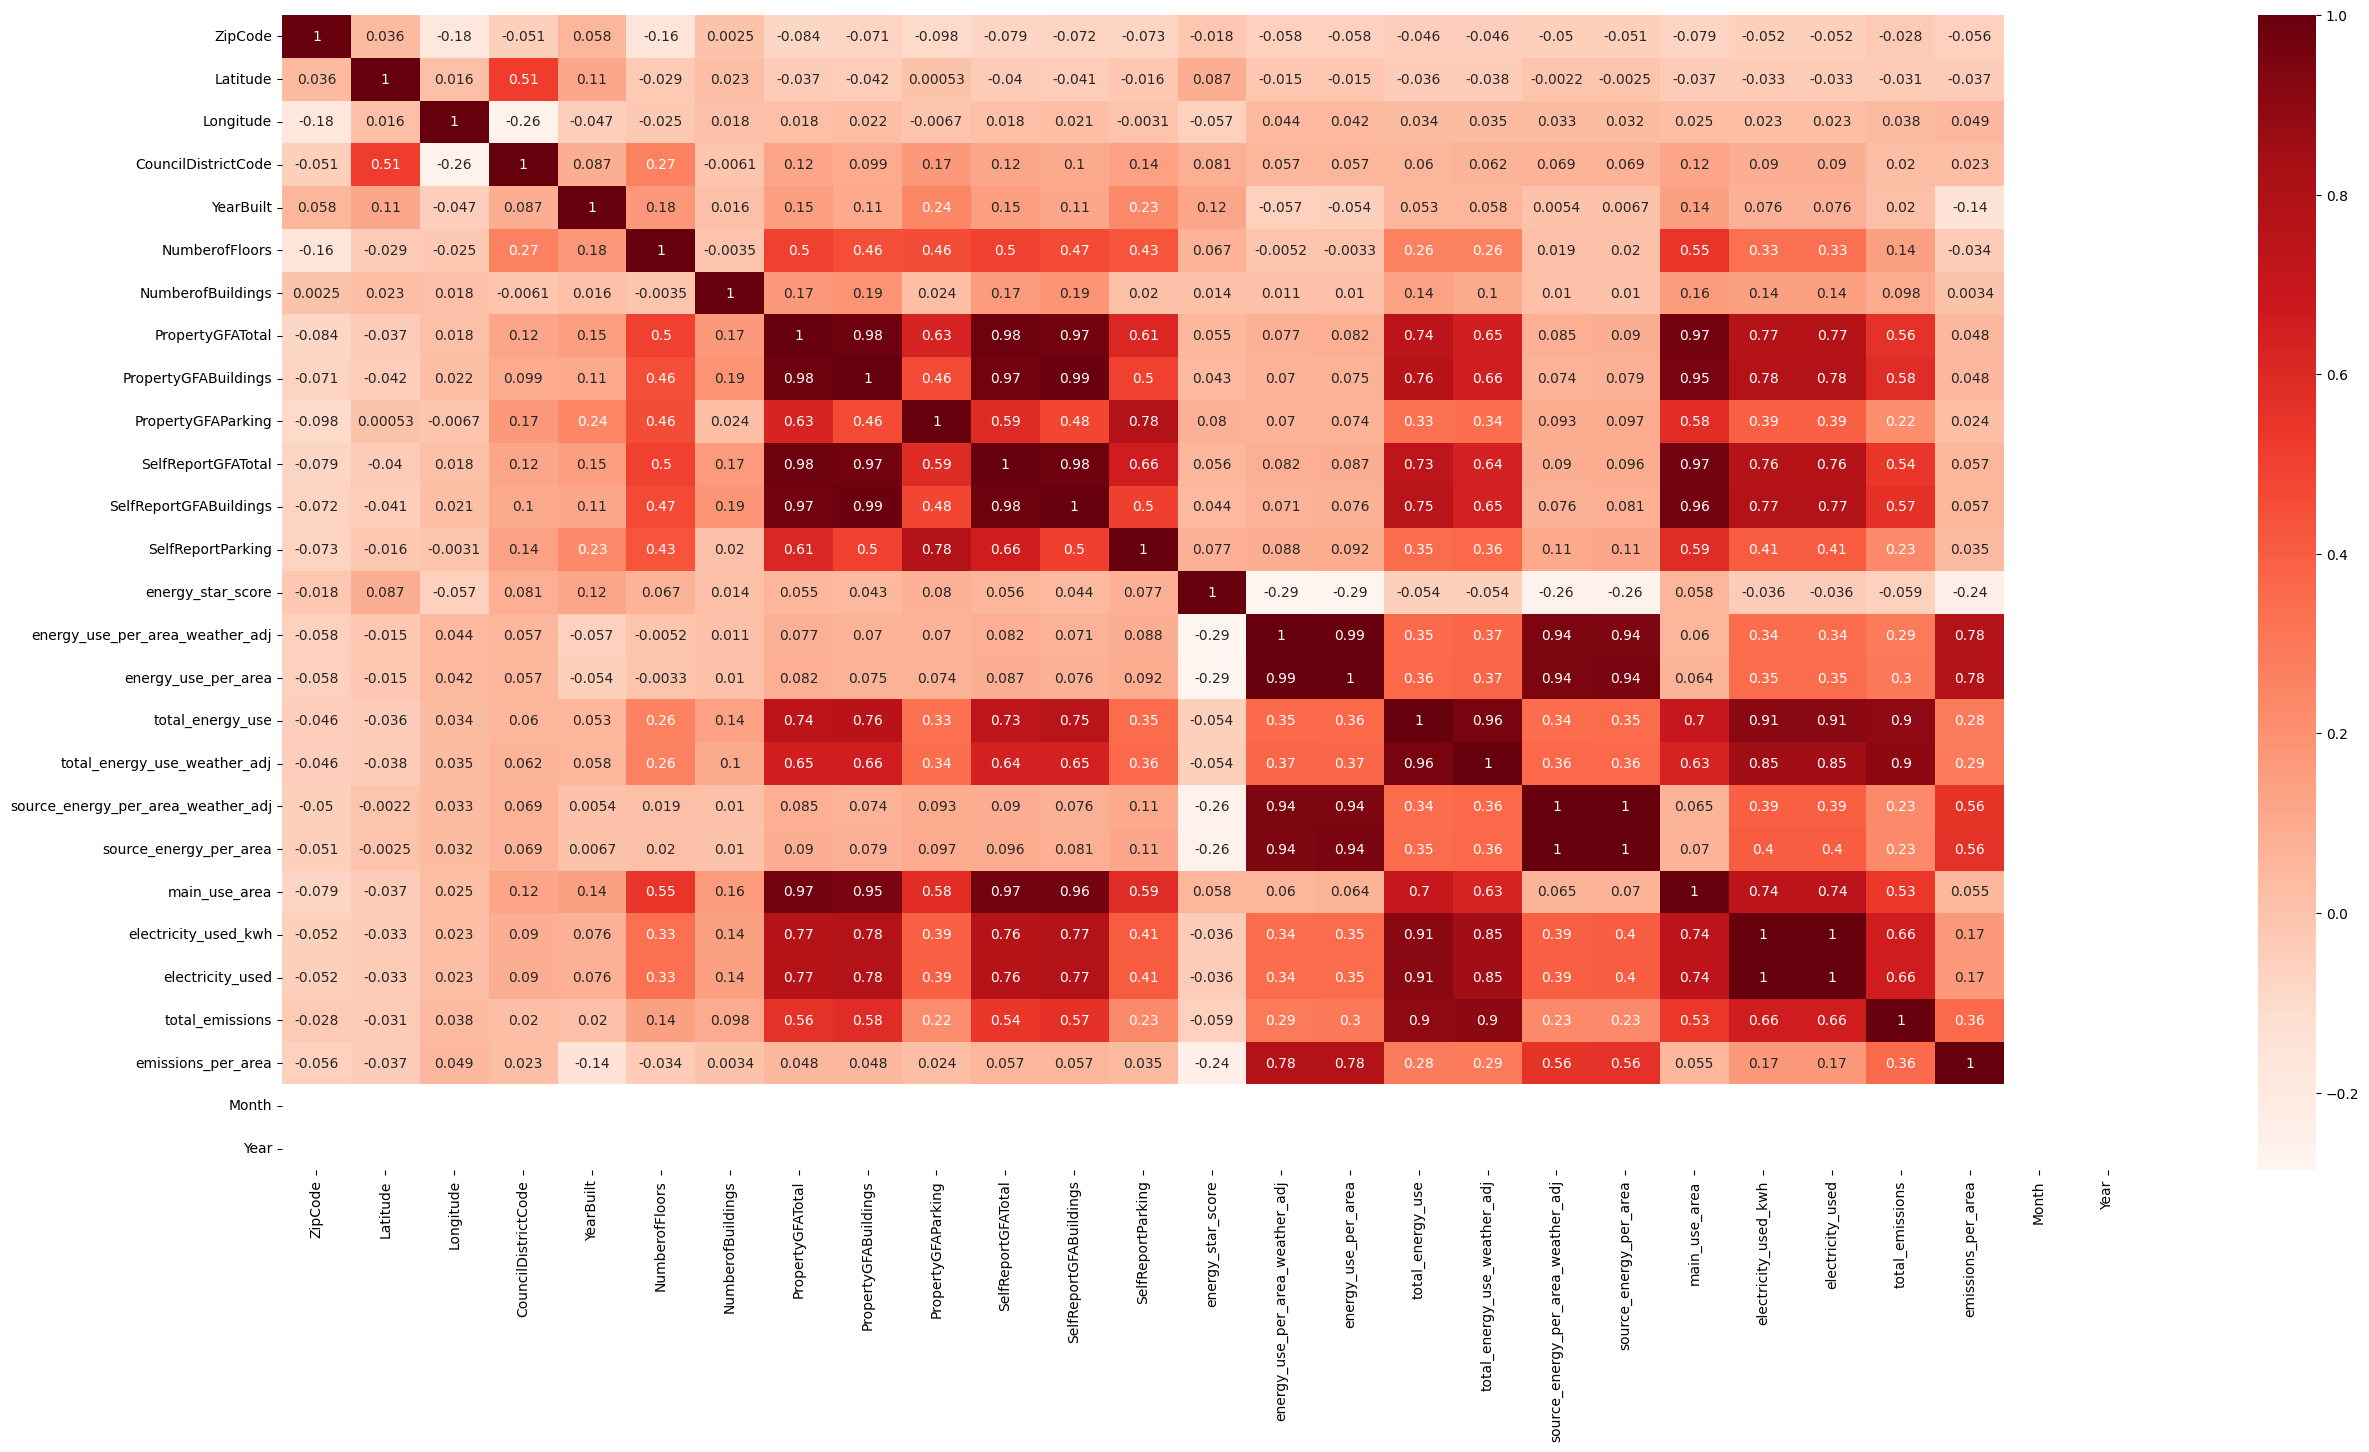

In [13]:
plt.figure(figsize=(30,15))
sns.heatmap(df[numerical_col].corr(),annot=True,cmap="Reds")



In [14]:
df.drop(['PropertyGFABuildings','SelfReportGFABuildings','energy_use_per_area_weather_adj','total_energy_use_weather_adj','source_energy_per_area_weather_adj','electricity_used'],axis=1,inplace=True)

In [15]:
ax=px.scatter(df,x='total_energy_use',y='electricity_used_kwh',color='total_emissions')
ax.update_layout(
    title="Fine",
    xaxis_title="Total energy used per Bulding",
    yaxis_title="electricity_used_kwh"

)

In [16]:
df.reset_index(inplace=True)

df.shape


(30657, 33)

In [17]:
df.columns

Index(['index', 'BuildingName', 'BuildingType', 'Address', 'City', 'State',
       'ZipCode', 'Latitude', 'Longitude', 'Neighborhood',
       'CouncilDistrictCode', 'YearBuilt', 'NumberofFloors',
       'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFAParking',
       'SelfReportGFATotal', 'SelfReportParking', 'energy_star_score',
       'energy_use_per_area', 'total_energy_use', 'source_energy_per_area',
       'property_type', 'main_use_of_property', 'main_use_area',
       'electricity_used_kwh', 'compliance_status', 'compliance_issue',
       'total_emissions', 'emissions_per_area', 'was_demolished', 'Month',
       'Year'],
      dtype='object')

**bold text**
energy_use_per_area_weather_adj:Weather-adjusted energy use per square foot/meter. Helps compare buildings fairly.




energy_use_per_area:	Actual energy use per unit area, without adjusting for weather. Can be misleading if weather was extreme.

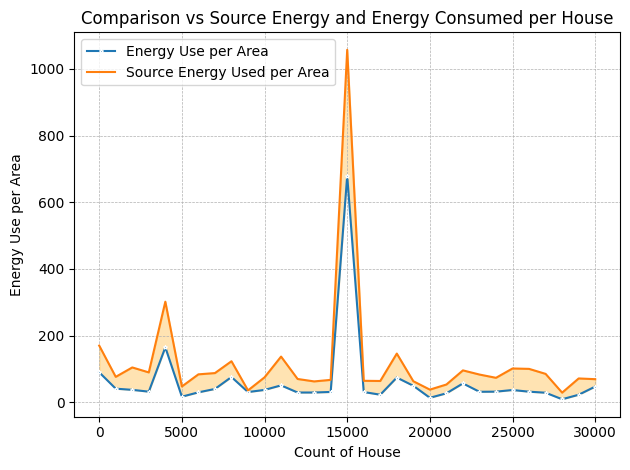

In [18]:
sample_df_1 = df.iloc[::1000].reset_index(drop=True)

ax = sns.lineplot(data=sample_df_1, x="index", y='energy_use_per_area', marker="*", markersize=3, label="Energy Use per Area")
ax = sns.lineplot(data=sample_df_1, x="index", y='source_energy_per_area', markersize=3, label="Source Energy Used per Area")

ax.set_title('Comparison vs Source Energy and Energy Consumed per House')
ax.set_xlabel("Count of House")
ax.set_ylabel("Energy Use per Area")
ax.fill_between(sample_df_1["index"], sample_df_1["energy_use_per_area"], sample_df_1["source_energy_per_area"], color='orange', alpha=0.3)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Total emission vs Electricity used ')

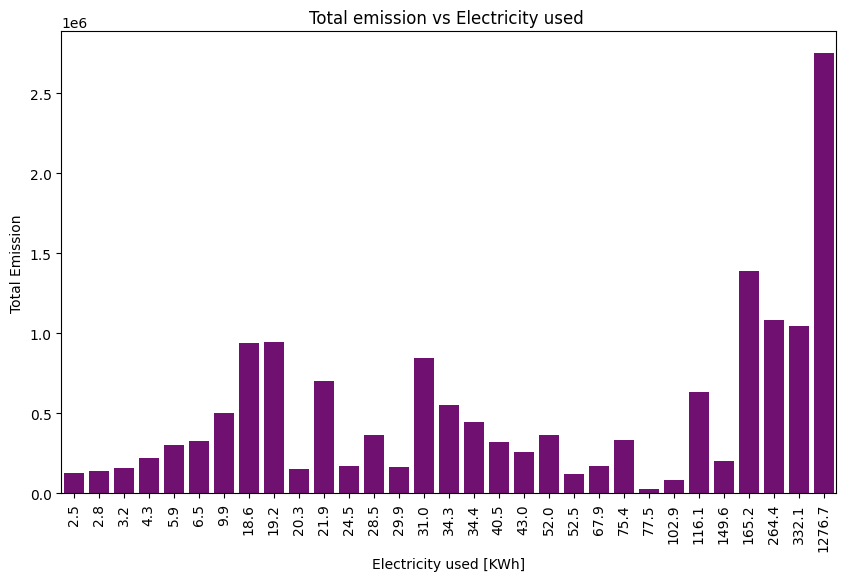

In [19]:
fig,axes=plt.subplots(figsize=(10,6))
sample_df=df.iloc[::1000]
#sns.lineplot(data=sample_df,x="total_emissions",y="electricity_used_kwh")
ax=sns.barplot(data=sample_df,y="electricity_used_kwh",x="total_emissions",color="purple")

ax.set_xlabel("Electricity used [KWh]",color="black")
ax.set_ylabel("Total Emission",color="black")
ax.tick_params(axis='y',labelcolor='black')
ax.tick_params(axis="x",labelcolor="black",rotation=90)
ax.set_title("Total emission vs Electricity used ")





In [20]:
df.head()
df.head(1)

,index,BuildingName,BuildingType,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,SelfReportGFATotal,SelfReportParking,energy_star_score,energy_use_per_area,total_energy_use,source_energy_per_area,property_type,main_use_of_property,main_use_area,electricity_used_kwh,compliance_status,compliance_issue,total_emissions,emissions_per_area,was_demolished,Month,Year
0,0,MAYFLOWER PARK HOTEL,NonResidential,405 OLIVE WAY,SEATTLE,WA,98101.0,47.6122,-122.33799,DOWNTOWN,7.0,1927.0,12.0,1.0,88434.0,0.0,88434.0,0.0,61.0,90.099998,7970388.0,170.199997,Hotel,Hotel,88434.0,1047120.0,Compliant,No Issue,332.1,3.76,False,1.0,1970.0


In [21]:
df["Year"]=pd.to_datetime(df["Year"])
#electricity usage carbon emission
#Total energy usage,carbon emission hue source energy per area

Text(0.5, 1.0, 'Total emission vs Total energy used')

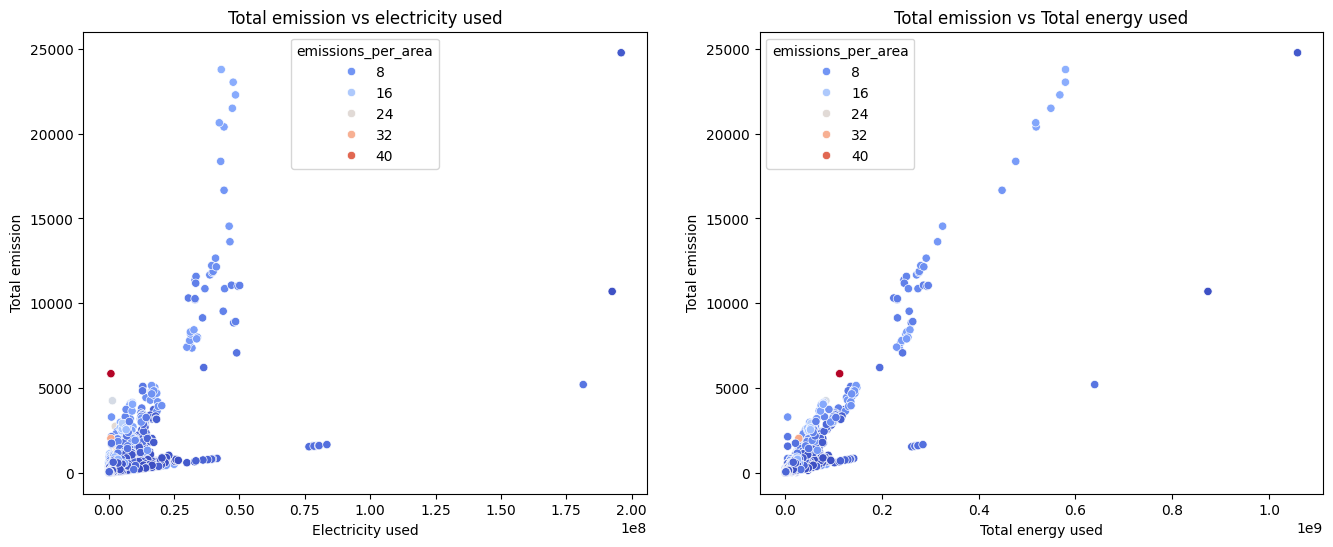

In [22]:

fig,axes=plt.subplots(1,2,figsize=(16,6))



ax=sns.scatterplot(data=df,x="electricity_used_kwh",y="total_emissions",hue="emissions_per_area",ax=axes[0],palette="coolwarm")
ax.set_xlabel("Electricity used")
ax.set_ylabel("Total emission")
ax.set_title("Total emission vs electricity used")



ax1=sns.scatterplot(data=df,y="total_emissions",x="total_energy_use",hue="emissions_per_area",palette="coolwarm",ax=axes[1])
ax1.set_xlabel("Total energy used")
ax1.set_ylabel("Total emission")
ax1.set_title("Total emission vs Total energy used")



In [23]:
df.head()
df.columns

Index(['index', 'BuildingName', 'BuildingType', 'Address', 'City', 'State',
       'ZipCode', 'Latitude', 'Longitude', 'Neighborhood',
       'CouncilDistrictCode', 'YearBuilt', 'NumberofFloors',
       'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFAParking',
       'SelfReportGFATotal', 'SelfReportParking', 'energy_star_score',
       'energy_use_per_area', 'total_energy_use', 'source_energy_per_area',
       'property_type', 'main_use_of_property', 'main_use_area',
       'electricity_used_kwh', 'compliance_status', 'compliance_issue',
       'total_emissions', 'emissions_per_area', 'was_demolished', 'Month',
       'Year'],
      dtype='object')

In [24]:
df.head()

,index,BuildingName,BuildingType,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,SelfReportGFATotal,SelfReportParking,energy_star_score,energy_use_per_area,total_energy_use,source_energy_per_area,property_type,main_use_of_property,main_use_area,electricity_used_kwh,compliance_status,compliance_issue,total_emissions,emissions_per_area,was_demolished,Month,Year
0,0,MAYFLOWER PARK HOTEL,NonResidential,405 OLIVE WAY,SEATTLE,WA,98101.0,47.61220,-122.33799,DOWNTOWN,7.0,1927.0,12.0,1.0,88434.0,0.0,88434.0,0.0,61.0,90.099998,7970388.0,170.199997,Hotel,Hotel,88434.0,1047120.0,Compliant,No Issue,332.1,3.76,False,1.0,1970-01-01 00:00:00.000001970
1,1,PARAMOUNT HOTEL,NonResidential,724 PINE ST,SEATTLE,WA,98101.0,47.61307,-122.33361,DOWNTOWN,7.0,1996.0,11.0,1.0,103566.0,15064.0,103566.0,15064.0,84.0,73.900002,6539607.0,130.600006,Hotel,Hotel,88502.0,786237.0,Compliant,No Issue,220.0,2.49,False,1.0,1970-01-01 00:00:00.000001970
2,2,WESTIN HOTEL (Parent Building),NonResidential,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,-122.33822,DOWNTOWN,7.0,1969.0,41.0,3.0,956110.0,196718.0,947059.0,119493.0,75.0,77.699997,64340116.0,165.699997,Hotel,Hotel,827566.0,11121130.0,Compliant,No Issue,2192.8,2.89,False,1.0,1970-01-01 00:00:00.000001970
3,3,HOTEL MAX,NonResidential,620 STEWART ST,SEATTLE,WA,98101.0,47.61412,-122.33664,DOWNTOWN,7.0,1926.0,10.0,1.0,61320.0,0.0,61320.0,0.0,55.0,82.099998,5033692.0,165.300003,Hotel,Hotel,61320.0,780180.0,Compliant,No Issue,176.1,2.87,False,1.0,1970-01-01 00:00:00.000001970
4,4,WARWICK SEATTLE HOTEL,NonResidential,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,-122.34047,DOWNTOWN,7.0,1980.0,18.0,1.0,175580.0,62000.0,203942.0,80497.0,83.0,104.300003,12875073.0,177.300003,Hotel,Hotel,123445.0,1401668.0,Compliant,No Issue,456.6,4.02,False,1.0,1970-01-01 00:00:00.000001970


In [25]:
#Priliminary analysis 
pdf=df[['BuildingType', 'Latitude', 'Longitude','CouncilDistrictCode','YearBuilt','NumberofFloors',
       'NumberofBuildings','PropertyGFATotal','PropertyGFAParking','energy_star_score','total_energy_use','property_type','electricity_used_kwh', 'compliance_status','was_demolished','Month',]]

pdf.shape


counting=pdf[['BuildingType']].value_counts().reset_index()
counting

,BuildingType,count
0,NonResidential,12112
1,Multifamily LR (1-4),9408
2,Multifamily MR (5-9),6100
3,Multifamily HR (10+),1120
4,SPS-District K-12,834
5,Nonresidential COS,559
6,Campus,392
7,Nonresidential WA,132


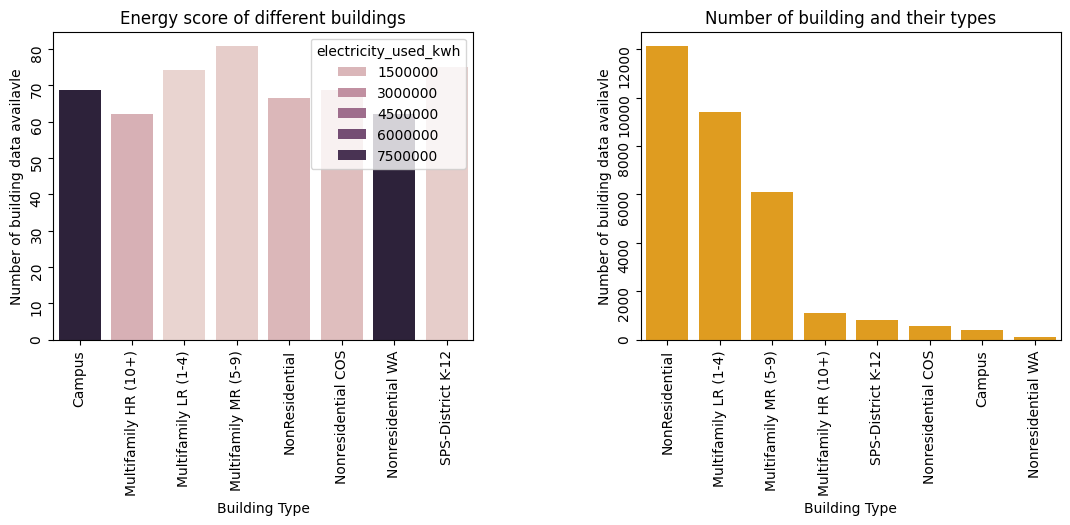

In [71]:
fig,axes=plt.subplots(1,2,figsize=(13,4))
fig.subplots_adjust(wspace=0.4)


ax=sns.barplot(data=counting,x="BuildingType",y="count",ax=axes[1],color="orange")
ax.set_ylabel("Number of building data availavle")
ax.set_xlabel("Building Type")
ax.set_title("Number of building and their types")
ax.tick_params(rotation=90)




building_type=df.groupby('BuildingType')[["energy_star_score","electricity_used_kwh"]].mean()

ax=sns.barplot(data=building_type,x=building_type.index.get_level_values(0),y="energy_star_score",hue="electricity_used_kwh",ax=axes[0])
ax.tick_params(rotation=0)
ax.set_ylabel("Number of building data availavle")
ax.set_xlabel("Building Type")
ax.set_title("Energy score of different buildings")
ax.tick_params(rotation=90)



In [27]:




building_type=df.groupby('BuildingType')[["energy_star_score","electricity_used_kwh"]].mean()

ax=sns.barplot(data=building_type,x=building_type.index.get_level_values(0),y="energy_star_score",hue="electricity_used_kwh",ax=axes[0])
ax.tick_params(rotation=0)
ax.set_ylabel("Number of building data availavle")
ax.set_xlabel("Building Type")
ax.set_title("Energy score of different buildings")
ax.tick_params(rotation=90)




In [28]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

emission_insite = df.groupby("BuildingType")[["electricity_used_kwh", "total_emissions", "total_energy_use"]].mean()

fig1 = px.bar(emission_insite, 
              x=emission_insite.index, 
              y="total_emissions", 
              color="electricity_used_kwh",
              title="Total Emissions by Building Type")

fig2 = px.bar(emission_insite, 
              x=emission_insite.index, 
              color="total_energy_use", 
              y="total_emissions",
              title="Total emission by Building Type")

fig = make_subplots(rows=1, cols=2, subplot_titles=("Total Emissions(ELECTRICITY USE IS COLORED)", "Total Energy Use(ENERGY USE IS COLORED)"))

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(height=500, width=1000, title_text="Building Type Energy Insights", showlegend=False)
fig.show()


In [56]:

new_df=pdf.groupby(['CouncilDistrictCode','BuildingType'])["energy_star_score"].mean().reset_index()
ax=px.bar(new_df,color="BuildingType",y="energy_star_score",x="CouncilDistrictCode")
#ax.set_xlabel("District code")
#ax.set_ylabel("Mean energy star score")
#ax.set_title("Energy star score on avarage")
ax.update_layout(
    xaxis_title="District Code",
    yaxis_title="Mean energy score",
    title="Mean energy score district code wise",
    height=400,
    width=800
)

Text(0.5, 1.0, 'Standing of energy usage with amount of proparty reported')

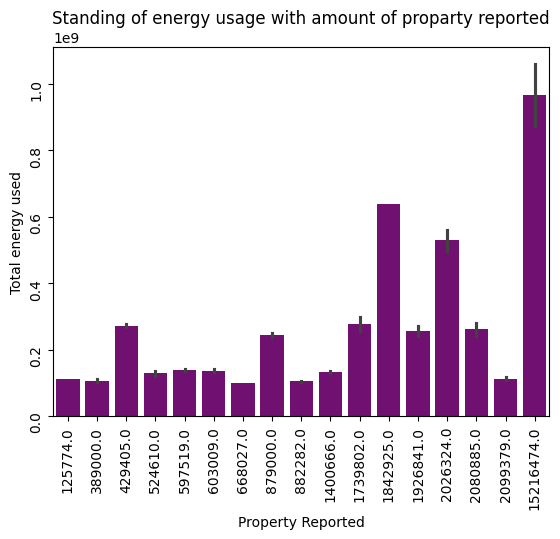

In [59]:
ax=sns.barplot(data=pdf.sort_values(by="total_energy_use",ascending=False).head(100),x="PropertyGFATotal",y="total_energy_use",color="purple")
ax.tick_params(rotation=90)
ax.set_xlabel("Property Reported")
ax.set_ylabel('Total energy used')
ax.set_title("Standing of energy usage with amount of proparty reported")

[None, None, None, None, None, None, None, None, None, None, None]

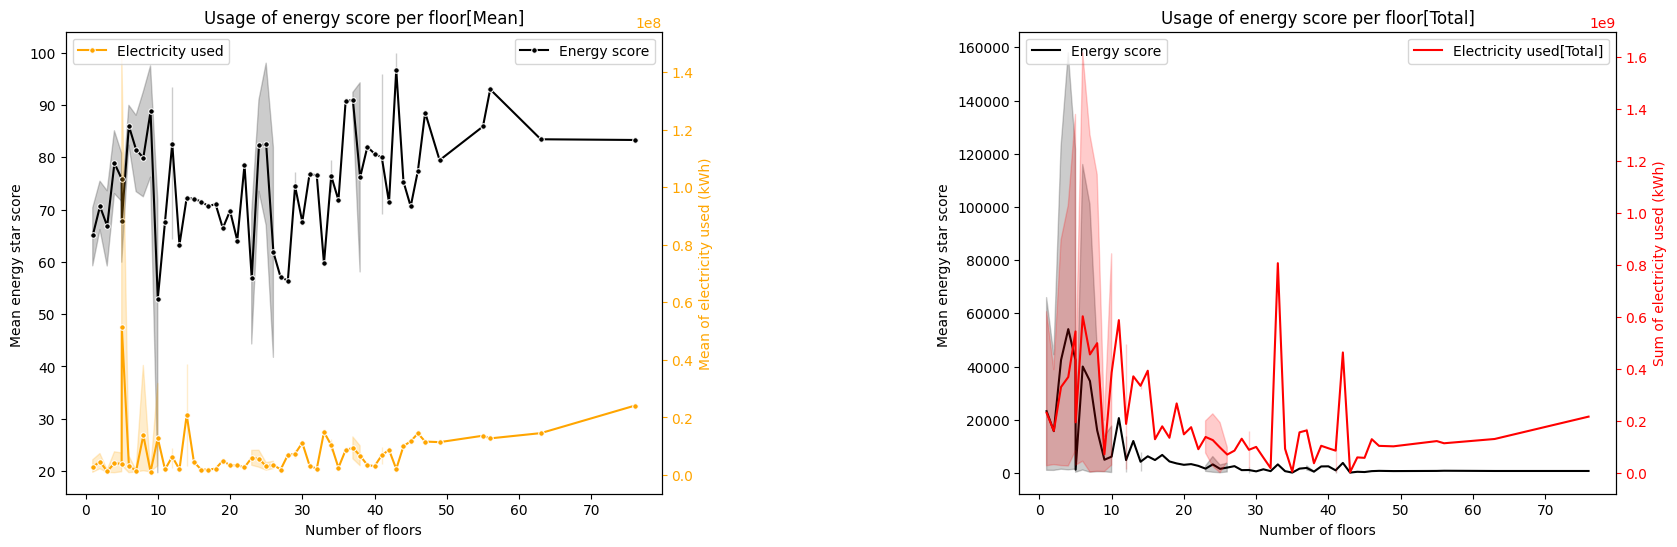

In [31]:
fig,axes=plt.subplots(1,2,figsize=(20,6))
fig.subplots_adjust(hspace=0.4,wspace=0.6)
number_of_floor = pdf.groupby(["NumberofFloors", "NumberofBuildings"])[["energy_star_score", "electricity_used_kwh"]].agg(["mean", "sum"])
number_of_floor.columns=[(",").strip().join(col) for col in number_of_floor.columns]
sorted_value=number_of_floor.sort_values(by='energy_star_score,mean',ascending=False)


ax=axes[0]



ax=sns.lineplot(data=sorted_value.head(128),x="NumberofFloors",y="energy_star_score,mean",color="black",marker="o",markersize=4,ax=ax,label="Energy score")

ax.set_title("Usage of energy score per floor[Mean]",color="black")
#sns.barplot(data=sorted_value.head(20),x="NumberofFloors",y="mean",color="blue")
ax.set_xlabel("Number of floors",color="black")
ax.set_ylabel("Mean energy star score ",color="black")
ax.tick_params(axis="both",color="black")
plt.setp(ax.get_xticklabels(), color='black')
plt.setp(ax.get_yticklabels(), color='black')

ax1=ax.twinx()

sns.lineplot(data=sorted_value.head(128),x="NumberofFloors",y="electricity_used_kwh,mean",color="orange",marker="o",markersize=4,label="Electricity used",ax=ax1)
ax1.legend(loc="upper left")
#sns.barplot(data=sorted_value.head(20),x="NumberofFloors",y="mean",color="blue")
ax1.set_ylabel("Mean of electricity used (kWh)", color="orange")
ax1.tick_params(axis="y", colors="orange")
plt.setp(ax1.get_yticklabels(), color='orange')


ax2=axes[1]



ax2=sns.lineplot(data=sorted_value.head(128),x="NumberofFloors",y="energy_star_score,sum",color="black",markersize=4,ax=ax2,label="Energy score")


#sns.barplot(data=sorted_value.head(20),x="NumberofFloors",y="mean",color="blue")
ax2.set_xlabel("Number of floors",color="black")
ax2.set_ylabel("Mean energy star score ",color="black")
ax2.tick_params(axis="both",color="black")
plt.setp(ax.get_xticklabels(), color='black')
plt.setp(ax.get_yticklabels(), color='black')
ax2.legend(loc="upper left")
ax3=ax2.twinx()

sns.lineplot(data=sorted_value.head(128),x="NumberofFloors",y="electricity_used_kwh,sum",color="red",markersize=4,label="Electricity used[Total]",ax=ax3)
ax3.legend(loc="upper right")

ax3.set_title("Usage of energy score per floor[Total]",color="black")
#sns.barplot(data=sorted_value.head(20),x="NumberofFloors",y="mean",color="blue")

ax3.set_ylabel("Sum of electricity used (kWh)", color="red")
ax3.tick_params(axis="y", colors="red")
plt.setp(ax3.get_yticklabels(), color='red')

<Axes: xlabel='Year Built', ylabel='Number of Buildings'>

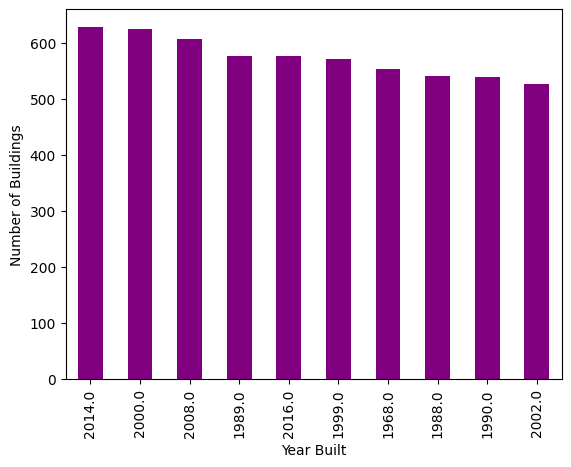

In [32]:
pdf.YearBuilt.value_counts().sort_values(ascending=False).head(10).plot(kind="bar",xlabel="Year Built",ylabel="Number of Buildings",color="purple")

In [33]:
number_of_floor.columns=[(",").join(col) for col in number_of_floor.columns]


In [34]:
pdf.loc[pdf["total_energy_use"].idxmax()]
pdf.loc[24159].total_energy_use

np.float64(1059039424.0)

In [35]:
proparty_type=pdf.groupby(["property_type"])[["energy_star_score","electricity_used_kwh"]].agg(["mean","sum"])
proparty_type.columns=[",".join(col).strip() for col in proparty_type.columns]
proparty_type_1=proparty_type.sort_values(by="energy_star_score,mean",ascending=False)
proparty_type_2=proparty_type.sort_values(by="electricity_used_kwh,mean",ascending=False)


[None, None, None, None, None, None, None, None]

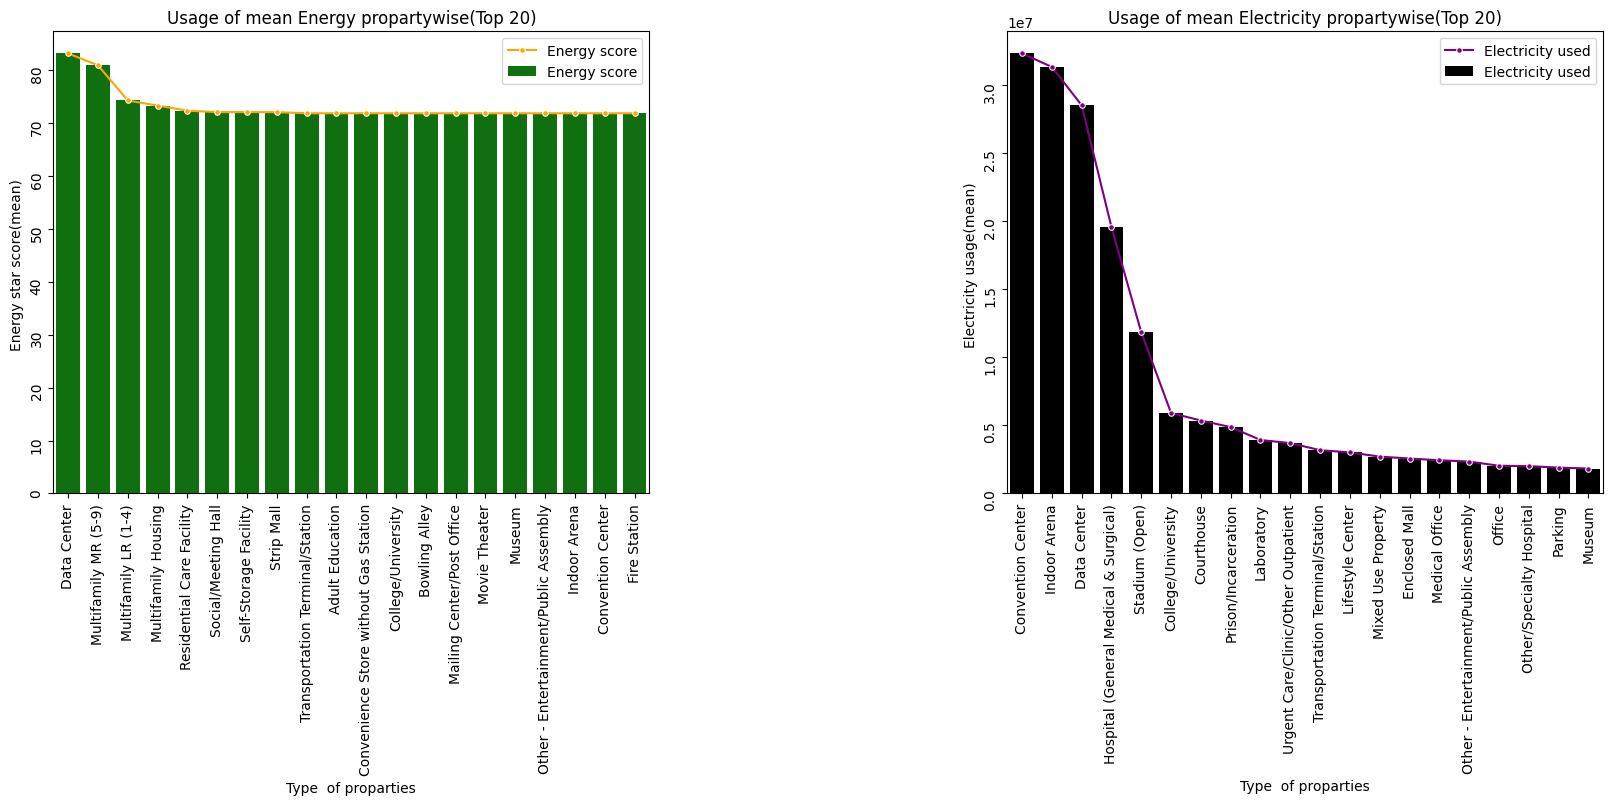

In [36]:
fig,axes=plt.subplots(1,2,figsize=(20,6))
fig.subplots_adjust(hspace=0.4,wspace=0.6)
ax=axes[0]
ax=sns.lineplot(data=proparty_type_1.head(20),x="property_type",y="energy_star_score,mean",color="orange",marker="o",markersize=4,ax=ax,label="Energy score")
ax=sns.barplot(data=proparty_type_1.head(20),x="property_type",y="energy_star_score,mean",color="green",ax=ax,label="Energy score")
ax.set_title("Usage of mean Energy propartywise(Top 20)",color="black")
#sns.barplot(data=sorted_value.head(20),x="NumberofFloors",y="mean",color="blue")
ax.set_xlabel("Type  of proparties",color="black")
ax.set_ylabel("Energy star score(mean) ",color="black")
ax.tick_params(rotation=90)
ax.tick_params(axis="both",color="black")
plt.setp(ax.get_xticklabels(), color='black')
plt.setp(ax.get_yticklabels(), color='black')



ax1=axes[1]
ax1=sns.lineplot(data=proparty_type_2.head(20),x="property_type",y="electricity_used_kwh,mean",color="purple",marker="o",markersize=4,ax=ax1,label="Electricity used")
ax1=sns.barplot(data=proparty_type_2.head(20),x="property_type",y="electricity_used_kwh,mean",color="black",ax=ax1,label="Electricity used")
ax1.set_title("Usage of mean Electricity propartywise(Top 20)",color="black")
#sns.barplot(data=sorted_value.head(20),x="NumberofFloors",y="mean",color="blue")
ax1.set_xlabel("Type  of proparties",color="black")
ax1.set_ylabel("Electricity usage(mean) ",color="black")
ax1.tick_params(rotation=90)
ax1.tick_params(axis="both",color="black")
plt.setp(ax1.get_xticklabels(), color='black')
plt.setp(ax1.get_yticklabels(), color='black')


In [37]:
proparty_type_1.reset_index(inplace=True)

In [38]:
proparty_type_1.columns

Index(['property_type', 'energy_star_score,mean', 'energy_star_score,sum',
       'electricity_used_kwh,mean', 'electricity_used_kwh,sum'],
      dtype='object')

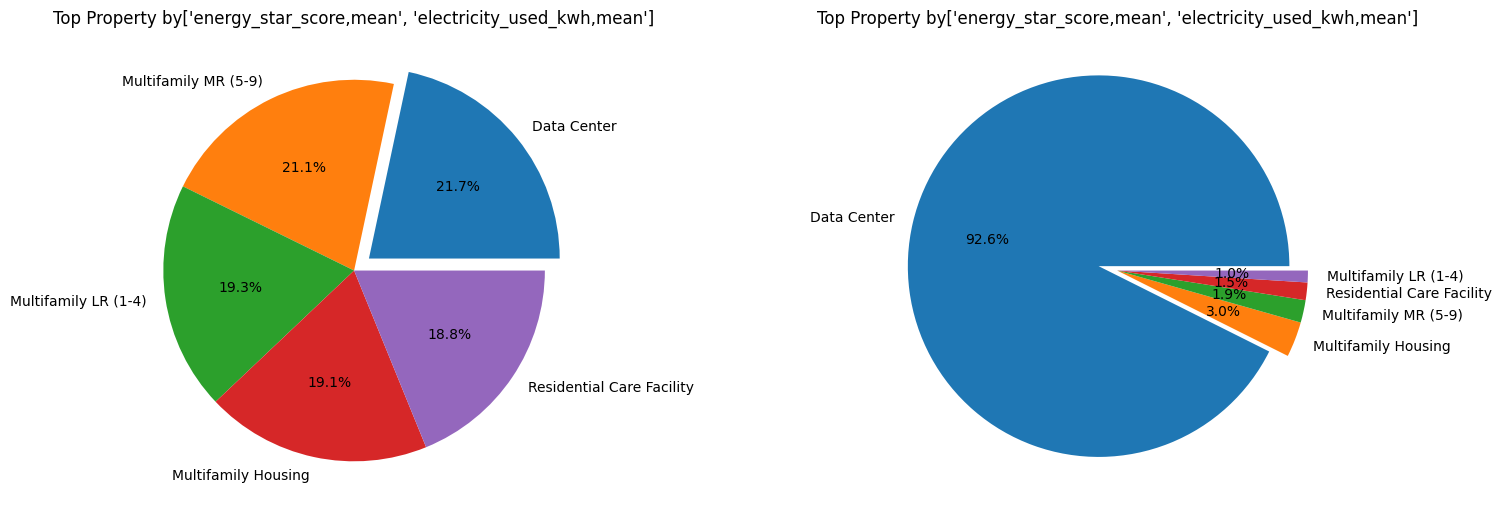

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes = axes.flatten()

lista = ['energy_star_score,mean', 'electricity_used_kwh,mean']
listb=['energy_star_score,sum','electricity_used_kwh,sum']
for ax, cont in zip(axes[0:2], lista):
    data = proparty_type_1.head(5).copy()
    data = data.sort_values(cont, ascending=False)
    myexplode = [0] * len(data)
    max_value_index = data[cont].idxmax()
    myexplode[max_value_index] = 0.1

    ax.pie(
        data[cont],
        labels=data["property_type"],
        autopct='%1.1f%%',
        explode=myexplode
    )
    ax.set_title(f"Top Property by{lista}")
fig.subplots_adjust(wspace=0.6)

plt.show()





In [40]:
pdf.BuildingType.nunique()

8

In [41]:
grouped_df=df.groupby(["City","State"])[["total_emissions","electricity_used_kwh"]].agg(["mean","sum"]).sort_values(by=("total_emissions","mean"),ascending=False).reset_index()


energy_use_per_area_weather_adj and source_energy_per_area_weather_adj